In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [22]:
df = pd.read_csv("../data/raw/dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
df.columns = ["review", "sentiment"]

df["sentiment"] = df["sentiment"].map({
    "positive": 1,
    "negative": 0
})

df["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [24]:
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["sentiment"]
)

y_train = train_df["sentiment"]
y_test = test_df["sentiment"]

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)


Train size: (40000, 2)
Test size: (10000, 2)


In [ ]:
configs = [
    {"max_features": 1000, "ngram": (1,1), "C": 1},
    {"max_features": 3000, "ngram": (1,1), "C": 1},
    {"max_features": 5000, "ngram": (1,1), "C": 1},
    {"max_features": 5000, "ngram": (1,2), "C": 0.1},
    {"max_features": 5000, "ngram": (1,2), "C": 1},
    {"max_features": 5000, "ngram": (1,2), "C": 10},
]

In [ ]:
results = []

for cfg in configs:
    tfidf = TfidfVectorizer(
        stop_words="english",
        max_features=cfg["max_features"],
        ngram_range=cfg["ngram"]
    )

    X_train_vec = tfidf.fit_transform(train_df["review"])
    X_test_vec = tfidf.transform(test_df["review"])

    model = LogisticRegression(
        C=cfg["C"],
        max_iter=1000
    )

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="weighted"
    )

    results.append({
        "max_features": cfg["max_features"],
        "ngram_range": str(cfg["ngram"]),
        "C": cfg["C"],
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })

In [43]:
import pandas as pd

results_df = pd.DataFrame(results)

In [44]:
results_df

,max_features,ngram_range,C,Accuracy,Precision,Recall,F1-score
0,1000,"(1, 1)",1.0,0.8657,0.865751,0.8657,0.865695
1,3000,"(1, 1)",1.0,0.8853,0.885411,0.8853,0.885292
2,5000,"(1, 1)",1.0,0.8894,0.889505,0.8894,0.889393
3,5000,"(1, 2)",0.1,0.8742,0.874654,0.8742,0.874162
4,5000,"(1, 2)",1.0,0.8910,0.891116,0.8910,0.890992
5,5000,"(1, 2)",10.0,0.8849,0.884934,0.8849,0.884897


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

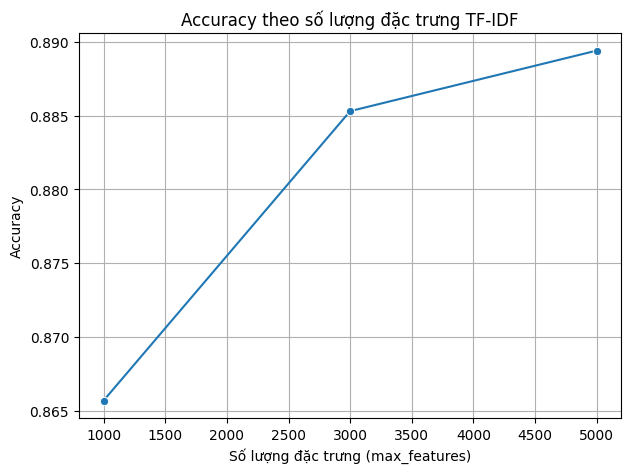

In [46]:
plt.figure(figsize=(7,5))
sns.lineplot(
    data=results_df[results_df["ngram_range"] == "(1, 1)"],
    x="max_features",
    y="Accuracy",
    marker="o"
)

plt.title("Accuracy theo số lượng đặc trưng TF-IDF")
plt.xlabel("Số lượng đặc trưng (max_features)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

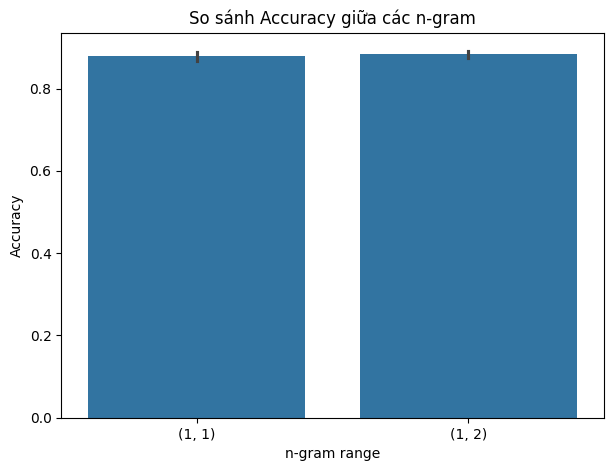

In [47]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=results_df,
    x="ngram_range",
    y="Accuracy"
)

plt.title("So sánh Accuracy giữa các n-gram")
plt.xlabel("n-gram range")
plt.ylabel("Accuracy")
plt.show()

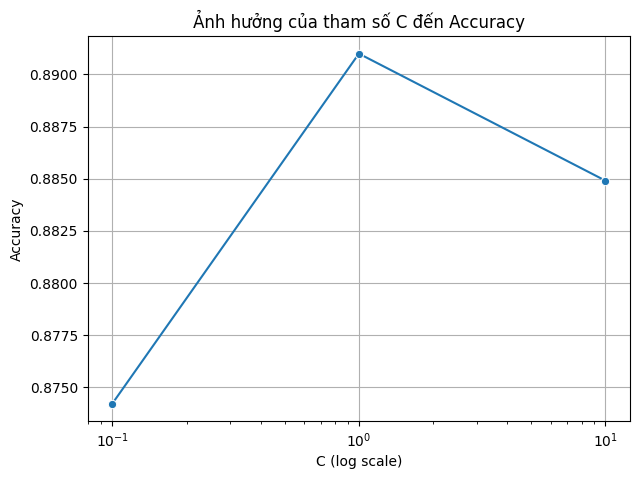

In [48]:
c_df = results_df[results_df["ngram_range"] == "(1, 2)"]

plt.figure(figsize=(7,5))
sns.lineplot(
    data=c_df,
    x="C",
    y="Accuracy",
    marker="o"
)

plt.xscale("log")
plt.title("Ảnh hưởng của tham số C đến Accuracy")
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()